### Real Estate Modelling Project -Srini

### Objective

-Build a model to predict house prices based on features provided in the dataset. <br />
-One of those parameters include understanding which factors are responsible for higher property value - $650K and above.<br />
-The data set consists of information on some 22,000 properties.  <br />
-The dataset consisted of historic data of houses sold between May 2014 to May 2015.<br />
-Tools to be used are Pandas (Jupyter notebook) and Tableau.<br />

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')
from haversine import haversine

### Fetching the data

In [2]:
df=pd.read_excel("Data_MidTerm_Project_Real_State_Regression.xls" ) # reading the excel file

#### Checking the data type of the features for any corrections

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

#### Checking the column headers for case consistency and spacing for any corrections

In [4]:
col_list = df.columns
col_list

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [5]:
#filtered view of the repetitive house ids
repetitive_sales = df.groupby('id').filter(lambda x: len(x) > 1) 
repetitive_sales

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,2014-07-25,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,430000
94,6021501535,2014-12-23,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
313,4139480200,2014-06-18,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1380000
314,4139480200,2014-12-09,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
324,7520000520,2014-09-05,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,232000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20763,6300000226,2014-06-26,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,240000
20764,6300000226,2015-05-04,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000
21564,7853420110,2014-10-03,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000,594866


#### Exploring the data

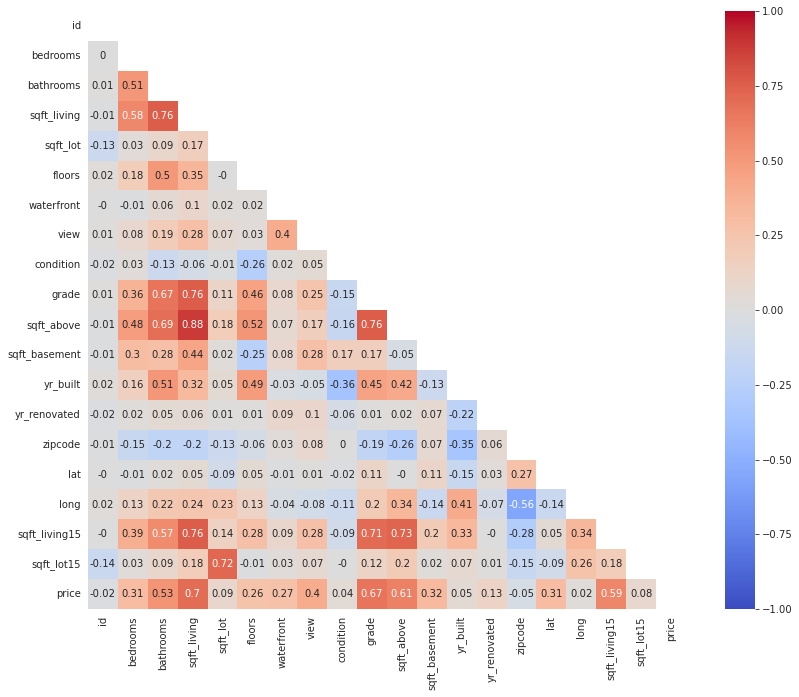

In [6]:
corr = round(df.corr(),2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 11))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [367]:
# List of variables to be dropped from the model
drop_list = ["price",
             "id",
             "yr_renovated",
             "floors",
             "sqft_above",
             "sqft_basement",
             "sqft_lot",
             "sqft_lot15",
             "sqft_living15",
            'dist_from_seattle',
            'dist_from_bellevue',
             'lat', 
             'long',
            "98002",
             "98007",
             "98008",
             "98010",
             "98011",
             "98014",
             "98019",
             "98022",
             "98024",
             "98027",
             "98034",
             "98045",
             "98065",
             "98072",
             "98074",
             "98075",
             "98077",
             "98125",
             "98126",
             "98133",
             "98136",
             "98144",
             "98148",
             "98155"]  # 'lat_long' is not a numeric element hence not passed on

In [306]:
outlier_list = []
for item in df.columns:
    if item not in drop_list:
        if item not in ['price','date']: # target variable
            outlier_list.append(item)

outlier_list

['bedrooms',
 'bathrooms',
 'sqft_living',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat_long',
 'dist_from_citycenter']

In [307]:
# placeholder for dealing with outliers
#Q1 = df.sqft_basement.quantile(0.25)
#Q3 = df.sqft_basement.quantile(0.75)
#IQR = Q3 - Q1    #IQR is interquartile range.

#filter = (df["price"] >= 100000) # Removed the houses with less than price of 100k, that accounted for 45 records 
#df=df.loc[filter]
#filter = (df['bedrooms'] !=33) # Removed the houses with less than condition value 1, that accounted for 29 records 
#df=df.loc[filter]

Mapping a new variable called distance from the epicenter to see how far the properties are located to the main areas of Seatlle and Bellevue.

In [308]:
df['lat_long'] = tuple(zip(df.lat,df.long)) # creating one column with a tuple using latitude and longitude coordinates
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,lat_long,dist_from_seattle,dist_from_bellevue,dist_from_citycenter
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,"(47.5112, -122.257)",7.714868,7.622786,7.622786
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,"(47.721, -122.319)",7.766476,9.041882,7.766476
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,"(47.7379, -122.233)",10.107949,8.561145,8.561145
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,"(47.5208, -122.393)",6.655340,10.979730,6.655340
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,"(47.6168, -122.045)",13.578402,7.402273,7.402273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,"(47.6993, -122.346)",6.241665,8.786684,6.241665
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,"(47.5107, -122.362)",6.910386,10.334432,6.910386
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,"(47.5944, -122.299)",2.016289,4.664177,2.016289
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000,"(47.5345, -122.069)",13.486821,8.420838,8.420838


In [309]:
df['zipcode']= df['zipcode'].astype(str)

In [310]:
seattle = [47.6092,-122.3363]
bellevue = [47.61555,-122.20392]

In [311]:
seattle_dist = []
for i in df['lat_long']:
    seattle_dist.append(haversine((seattle),(i), unit = 'mi'))
df['dist_from_seattle'] = pd.Series(seattle_dist)

In [312]:
bellevue_dist = []
for i in df['lat_long']:
    bellevue_dist.append(haversine((bellevue),(i), unit = 'mi'))
df['dist_from_bellevue'] = pd.Series(bellevue_dist)

In [313]:
df['dist_from_citycenter'] = df[['dist_from_seattle', 'dist_from_bellevue']].min(axis=1)

In [314]:
df_zip_dummies = pd.get_dummies(df['zipcode'])
df_zips= pd.concat([df, df_zip_dummies],axis=1)

In [315]:
df_zips.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,lat_long,dist_from_seattle,dist_from_bellevue,dist_from_citycenter,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,"(47.5112, -122.257)",7.714868,7.622786,7.622786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,"(47.721, -122.319)",7.766476,9.041882,7.766476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,"(47.7379, -122.233)",10.107949,8.561145,8.561145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,"(47.5208, -122.393)",6.655340,10.979730,6.655340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,"(47.6168, -122.045)",13.578402,7.402273,7.402273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [316]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,dist_from_seattle,dist_from_bellevue,dist_from_citycenter
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05,11.566251,10.778279,9.620696
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,0.138552,0.140724,685.230472,27274.441950,3.673681e+05,6.701493,5.777293,6.219998
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04,0.839430,0.254331,0.254331
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05,6.064329,6.951857,4.970507
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05,10.352923,9.380891,7.985093
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05,15.879248,13.306614,12.575693
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,48.064339,41.907930,41.907930


#### Applying Box-cox Powertransform

In [317]:
def plots (df, var, t):
    plt.figure(figsize= (13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after' + str(t).split('(')[0])

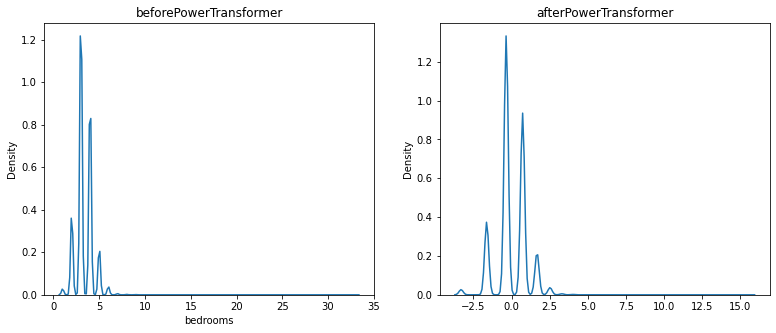

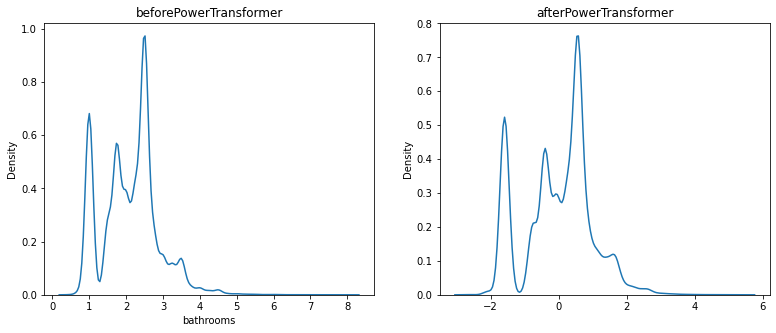

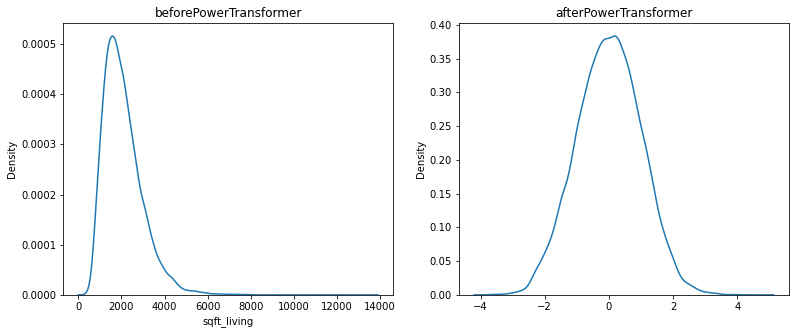

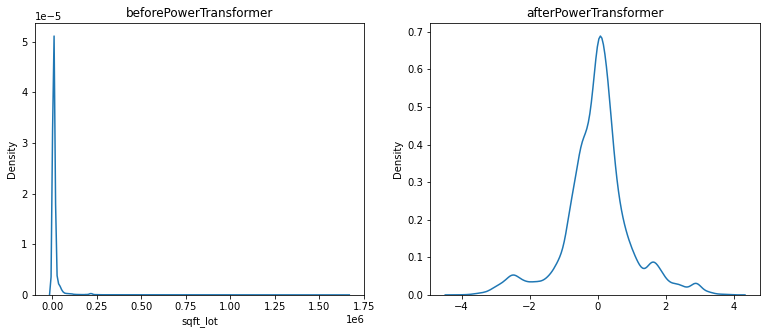

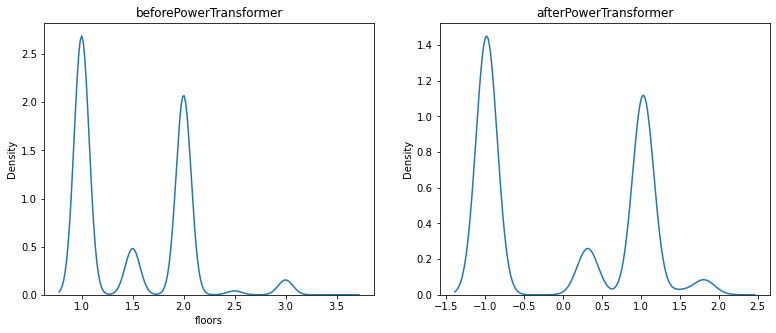

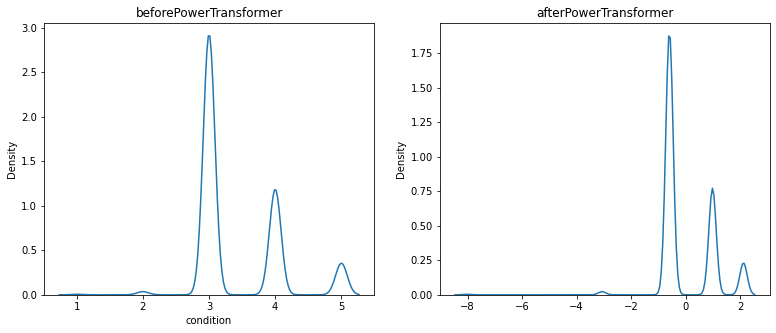

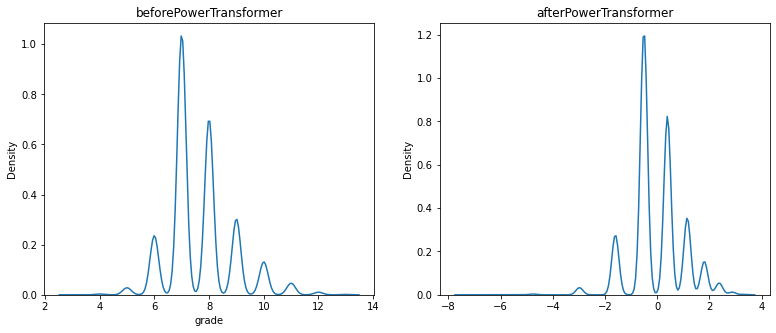

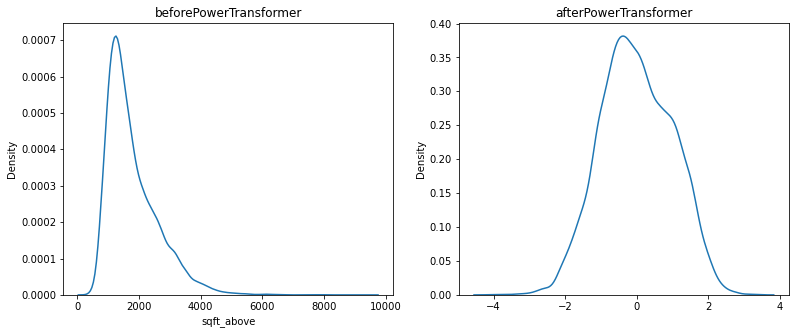

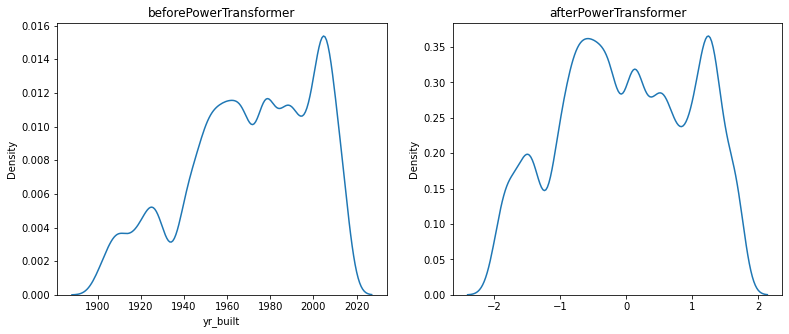

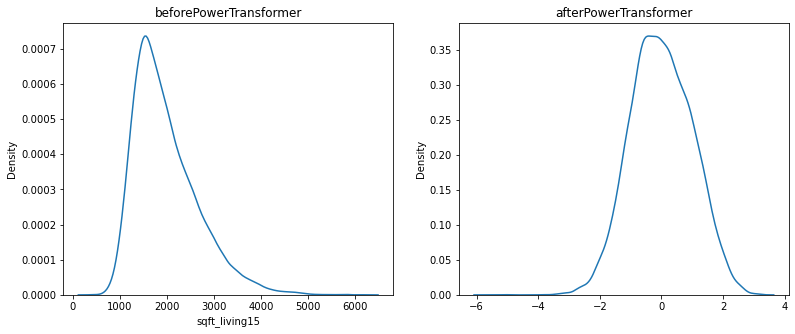

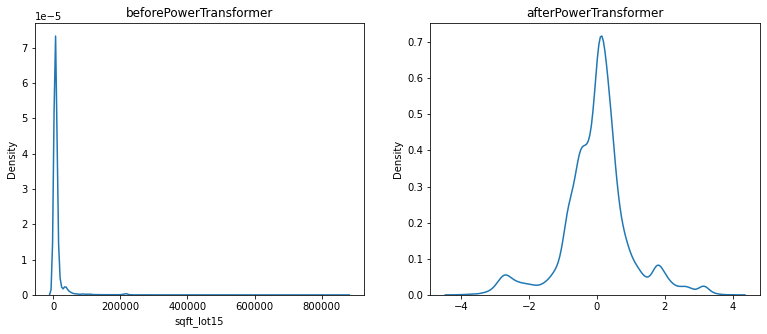

In [318]:
box_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above',
       'yr_built', 'sqft_living15', 'sqft_lot15']
for col in box_col:
    plots(df, col, PowerTransformer (method='box-cox'))

In [319]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,dist_from_seattle,dist_from_bellevue,dist_from_citycenter
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05,11.566251,10.778279,9.620696
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,0.138552,0.140724,685.230472,27274.441950,3.673681e+05,6.701493,5.777293,6.219998
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04,0.839430,0.254331,0.254331
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05,6.064329,6.951857,4.970507
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05,10.352923,9.380891,7.985093
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05,15.879248,13.306614,12.575693
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,48.064339,41.907930,41.907930


In [320]:
nulls_df = pd.DataFrame(round(df.isna().sum()/len(df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,id,0.0
1,date,0.0
2,bedrooms,0.0
3,bathrooms,0.0
4,sqft_living,0.0
5,sqft_lot,0.0
6,floors,0.0
7,waterfront,0.0
8,view,0.0
9,condition,0.0


#### Preparing the data

In [321]:
# x = df.drop("price", axis=1)
x = df_zips._get_numeric_data()
y = x['price']

In [322]:
x

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,dist_from_seattle,dist_from_bellevue,dist_from_citycenter,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900,7.714868,7.622786,7.622786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000,7.766476,9.041882,7.766476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000,10.107949,8.561145,8.561145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000,6.655340,10.979730,6.655340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000,13.578402,7.402273,7.402273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000,6.241665,8.786684,6.241665,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000,6.910386,10.334432,6.910386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101,2.016289,4.664177,2.016289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000,13.486821,8.420838,8.420838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [323]:
for col in drop_list:
    x.drop([col],axis=1,inplace=True)

#### Modelling the data

In [359]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21592    360000
21593    400000
21594    402101
21595    400000
21596    325000
Name: price, Length: 21597, dtype: int64

In [360]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state =1)

In [361]:
std_scaler=StandardScaler().fit(x_train) 

x_train_scaled=std_scaler.transform(x_train)

x_test_scaled=std_scaler.transform(x_test)

In [362]:
x_train_scaled[0]

array([-0.40369343, -1.451188  , -0.33019909, -0.08740861, -0.30882901,
       -0.63327748, -0.56143801, -0.47409039, -0.14636018, -0.13134508,
       -0.1148692 , -0.12432964, -0.08973189, -0.15056816, -0.15493311,
       -0.11742854, -0.12190723, -0.11119246, -0.11251868, -0.07706403,
       -0.14210863, -0.16594149, -0.0481725 , -0.11435082, -0.15746072,
       -0.16353206, -0.13583386, -0.1140908 , -0.13802736, -0.14629123,
       -0.14752477, -0.07155105, -0.12927786, -0.07356637, -0.17120714,
       -0.10173926, -0.12480881, -0.11251868, -0.09514558, -0.07316766,
       -0.11251868, -0.1675914 , -0.12528627, -0.16033241, -0.15335892,
       -0.09231772, -0.11692091, -0.1164112 , -0.11145891, -0.11145891,
       -0.10958087,  8.88741307, -0.07931209, -0.11717499, -0.12166249])

### Modeling using Statsmodels

#### without scaling

In [363]:
x_train_const= sm.add_constant(x_train) # adding a constant

model = sm.OLS(y_train, x_train_const).fit()
predictions_train = model.predict(x_train_const) 

x_test_const = sm.add_constant(x_test) # adding a constant
predictions_test = model.predict(x_test_const) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     1252.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:44:43   Log-Likelihood:            -2.3210e+05
No. Observations:               17277   AIC:                         4.643e+05
Df Residuals:                   17221   BIC:                         4.648e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.91e+06 

#### checking the significant variables

In [364]:
model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[1:].index.tolist()

['bedrooms',
 'bathrooms',
 'sqft_living',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'dist_from_citycenter',
 '98001',
 '98003',
 '98004',
 '98005',
 '98006',
 '98023',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98038',
 '98039',
 '98040',
 '98042',
 '98052',
 '98053',
 '98055',
 '98056',
 '98058',
 '98059',
 '98070',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98146',
 '98166',
 '98168',
 '98177',
 '98178',
 '98188',
 '98198',
 '98199']

In [365]:
significant_features=x[model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[1:].index.tolist()]

In [366]:
model = LinearRegression()
model.fit(x_train, y_train)
coefficients = list(model.coef_)
coefficients

[-29023.29804378877,
 14835.650402313593,
 191.42618737319935,
 676915.5789548194,
 52313.83886264576,
 20274.03464558713,
 65522.45759763432,
 -1129.715056551504,
 -8179.732206066445,
 -63786.41387616917,
 -96825.64363330175,
 535849.3133952904,
 84282.3451248327,
 54188.53209115335,
 -106453.43054290538,
 -48436.85607119351,
 47501.050193332514,
 -90002.85857040266,
 -109510.82867959005,
 -106803.37965877808,
 162576.73449854492,
 -46866.616128047084,
 1080376.3694796257,
 296671.04314166505,
 -81622.37553206533,
 33835.48267360628,
 51412.63966967969,
 -108622.20592550543,
 -84992.70894768447,
 -112068.79448773596,
 -67474.13522463382,
 -145066.19910199087,
 -89684.80432644633,
 232792.84784094302,
 98078.39019392517,
 229997.2224551229,
 -67978.35754107064,
 109506.90838631001,
 -102046.33359894138,
 218938.99680234503,
 373232.49304820615,
 108703.53410662878,
 47655.213743052416,
 94006.92221125326,
 -50138.2924768098,
 209392.3345944803,
 78295.33912711148,
 -67681.20263852611,


#### with scaling

In [340]:
x_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'dist_from_citycenter', '98001',
       '98003', '98004', '98005', '98006', '98023', '98028', '98029', '98030',
       '98031', '98032', '98033', '98038', '98039', '98040', '98042', '98052',
       '98053', '98055', '98056', '98058', '98059', '98070', '98092', '98102',
       '98103', '98105', '98106', '98107', '98108', '98109', '98112', '98115',
       '98116', '98117', '98118', '98119', '98122', '98146', '98166', '98168',
       '98177', '98178', '98188', '98198', '98199'],
      dtype='object')

In [341]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     1252.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:41:24   Log-Likelihood:            -2.3210e+05
No. Observations:               17277   AIC:                         4.643e+05
Df Residuals:                   17221   BIC:                         4.648e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.414e+05   1259.392    429.851      0.0

#### Linear regression

In [342]:
model=LinearRegression()    # model
model.fit(x_train_scaled, y_train)   # model train

y
y_pred=model.predict(x_test_scaled)   # model prediction


y_pred_train=model.predict(x_train_scaled)

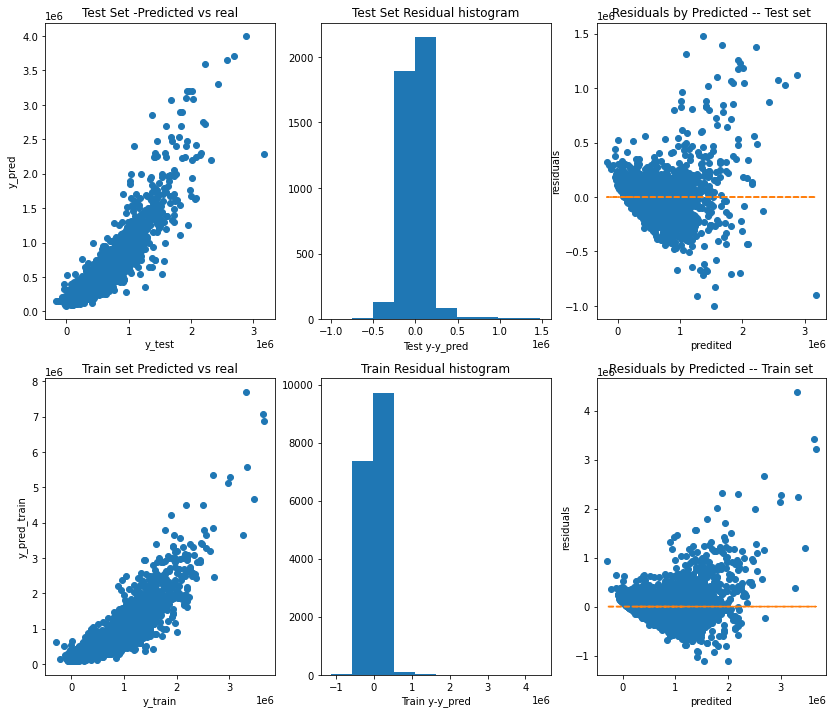

In [343]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,3,figsize=(14,12))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[0,2].plot(y_pred,y_test - y_pred,"o")
ax[0,2].set_xlabel("predited")
ax[0,2].set_ylabel("residuals")
ax[0,2].set_title("Residuals by Predicted -- Test set")
ax[0,2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

ax[1,2].plot(y_pred_train,y_train - y_pred_train,"o")
ax[1,2].set_xlabel("predited")
ax[1,2].set_ylabel("residuals")
ax[1,2].set_title("Residuals by Predicted -- Train set")
ax[1,2].plot(y_pred_train,np.zeros(len(y_pred_train)),linestyle='dashed')

In [344]:
y_pred =model.predict(x_test_scaled).astype(int)
y_change = round((y_pred/y_test)-1, 2)
result = pd.DataFrame({"y_test":y_test, "y_pred":y_pred, "∆ %": y_change})
result

,y_test,y_pred,∆ %
16729,244500,126295,-0.48
10996,190000,240313,0.26
12089,348500,390874,0.12
554,396000,322964,-0.18
16075,665000,650898,-0.02
...,...,...,...
13541,252000,316024,0.25
10735,194000,30777,-0.84
11018,235000,166285,-0.29
13521,332500,300766,-0.10


Text(0.5, 0, 'y_test - y_pred')

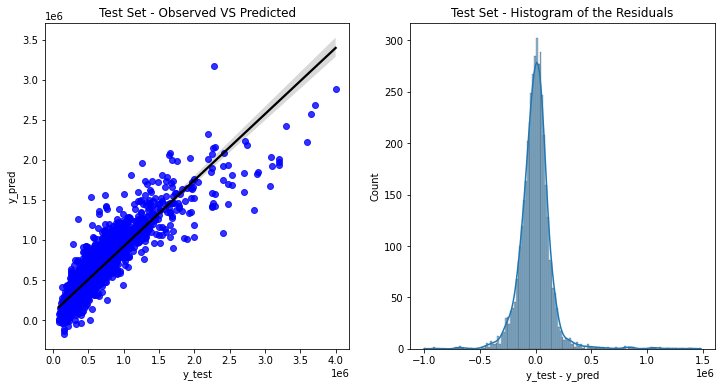

In [345]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

sns.regplot(x="y_test", y="y_pred", data=result, scatter_kws={"color": "blue"}, line_kws={"color": "black"}, ax=axs[0])
sns.histplot(y_test-y_pred, kde=True, ax=axs[1])

axs[0].set_title("Test Set - Observed VS Predicted")
axs[1].set_title("Test Set - Histogram of the Residuals")
axs[1].set_xlabel("y_test - y_pred")


### Model validation

In [346]:
train_mse=mse(y_train,y_pred_train)
test_mse=mse(y_test,y_pred)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 27313701193.004402 -- test MSE: 24167093406.302547


RMSE

In [347]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 165268.57291392214 -- test RMSE: 155457.69008415937


MAE

In [348]:
train_mae=mae(y_train,y_pred_train)
test_mae=mae(y_test,y_pred)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 27313701193.004402 -- test MAE: 24167093406.302547


R2

In [349]:
#R2= model.score(X_test_scaled, y_test)
R2_train=r2_score(y_train,y_pred_train)
R2_test=r2_score(y_test,y_pred)

print (R2_train)
print(R2_test)

0.7999361542973612
0.8121407076665732


In [350]:
print ('train R2: {} -- test R2: {}'.format(model.score(x_train_scaled, y_train),
                                            model.score(x_test_scaled, y_test)))

train R2: 0.7999361542973612 -- test R2: 0.8121407156636191


adjusted rsquare

In [351]:
Adj_R2_train= 1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
Adj_R2_train

0.7992971953801296

In [352]:
Adj_R2_test= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_R2_test

0.809717569514993

In [353]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [354]:
features_importances

,Attribute,Importance
2,sqft_living,175354.698759
6,grade,77114.135752
11,98004,65607.793779
3,waterfront,58719.619621
22,98039,51923.932867
...,...,...
42,98116,5878.274681
16,98029,5705.923492
15,98028,5610.503333
25,98052,5389.067796


In [355]:
metrics = {"MSE":mse(y_test, y_pred), "RMSE":mse(y_test, y_pred, squared=False), "MAE":mae(y_test, y_pred), "R2":r2_score(y_test, y_pred)}

In [356]:
metrics

{'MSE': 24167093406.302547,
 'RMSE': 155457.69008415937,
 'MAE': 97372.24097222222,
 'R2': 0.8121407076665732}

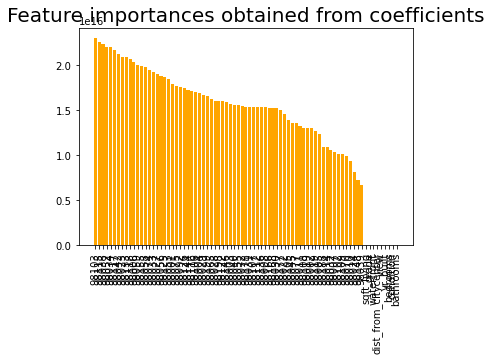

In [304]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='Orange')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Fine-tuning the models

#### Presenting the results

1.Summary of the dataset in 1 min, the key aspects of the dataset and observation. <br />
2. 
